In [1]:
from utils.calculation import Calculation
from model.individual_growth_model import IndividualGrowthModel

model = IndividualGrowthModel()

feed_rate = 0.6
fish_weight = 50
print("Feed Weight: " + str(Calculation.compute_feed_weight(feed_rate, fish_weight)))
print("Fish Weight Gain: " + str(model.compute_growth(f=feed_rate, T=33, DO=1, UIA=0, w=fish_weight)))

Feed Weight: 3.0
Fish Weight Gain: 3.2724543629515326


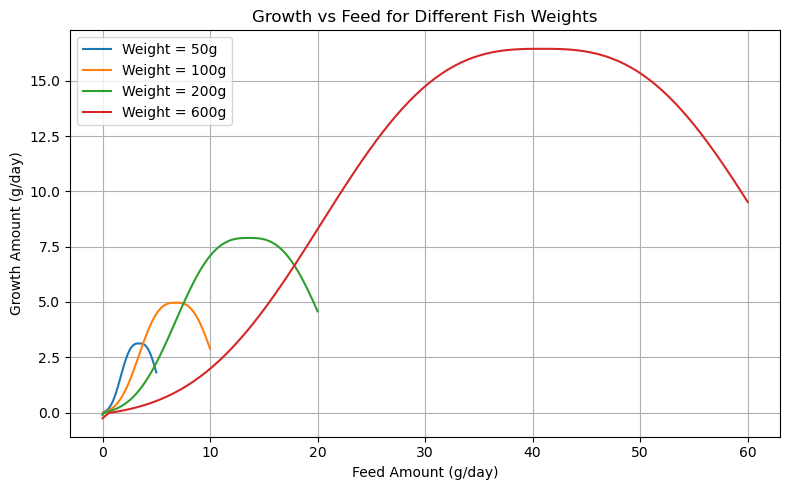

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from model.individual_growth_model import IndividualGrowthModel
from utils.calculation import Calculation

# Instantiate model
model = IndividualGrowthModel()

# Constants
T = 30
DO = 1
UIA = 0
feeding_rates = np.linspace(0, 1, 100)

# Fish weights to compare
weights = [50, 100, 200, 600]
feed_data = {}
growth_data = {}

# Calculate feed and growth for each weight
for w in weights:
    feed_amounts = [Calculation.compute_feed_weight(f, w) for f in feeding_rates]
    growth_amounts = [model.compute_growth(f, T, DO, UIA, w) for f in feeding_rates]
    feed_data[w] = feed_amounts
    growth_data[w] = growth_amounts

# Plot Feed Amount vs Growth Amount
plt.figure(figsize=(8, 5))
for w in weights:
    plt.plot(feed_data[w], growth_data[w], label=f'Weight = {w}g')
plt.xlabel("Feed Amount (g/day)")
plt.ylabel("Growth Amount (g/day)")
plt.title("Growth vs Feed for Different Fish Weights")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


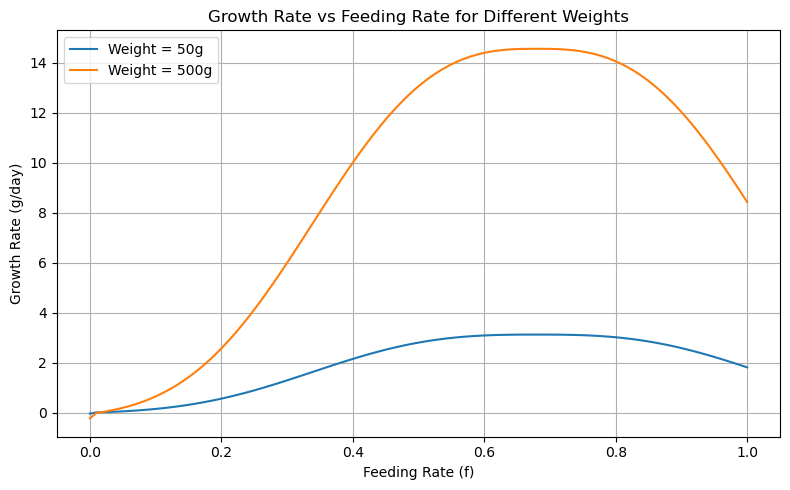

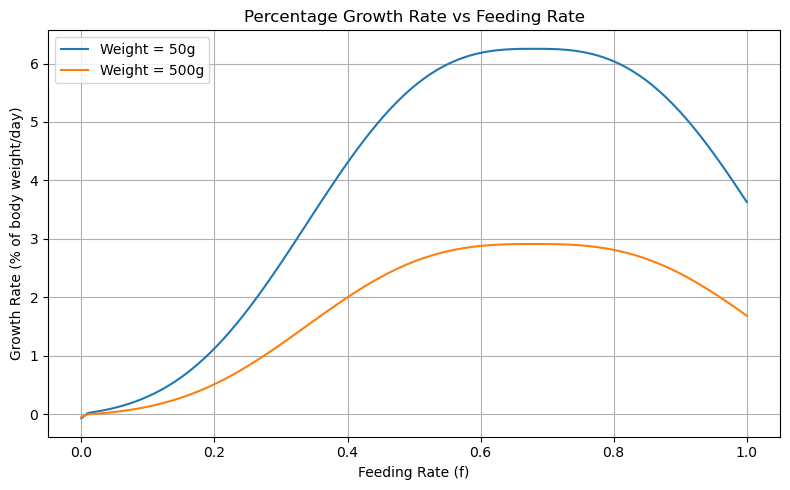

In [3]:
from model.individual_growth_model import IndividualGrowthModel
import math
import numpy as np
import matplotlib.pyplot as plt

# Instantiate model
model = IndividualGrowthModel()

# Define constants
T = 30
DO = 1
UIA = 0
initial_weight_50 = 50
initial_weight_500 = 500
# X values
feeding_rates = np.linspace(0, 1, 100)

# Y values for weight = 50 and 500
growth_w50 = [model.compute_growth(f, T, DO, UIA, 50) for f in feeding_rates]
growth_w500 = [model.compute_growth(f, T, DO, UIA, 500) for f in feeding_rates]
pct_growth_w50 = [(g / initial_weight_50) * 100 for g in growth_w50]
pct_growth_w500 = [(g / initial_weight_500) * 100 for g in growth_w500]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(feeding_rates, growth_w50, label='Weight = 50g')
plt.plot(feeding_rates, growth_w500, label='Weight = 500g')
plt.xlabel("Feeding Rate (f)")
plt.ylabel("Growth Rate (g/day)")
plt.title("Growth Rate vs Feeding Rate for Different Weights")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(feeding_rates, pct_growth_w50, label='Weight = 50g')
plt.plot(feeding_rates, pct_growth_w500, label='Weight = 500g')
plt.xlabel("Feeding Rate (f)")
plt.ylabel("Growth Rate (% of body weight/day)")
plt.title("Percentage Growth Rate vs Feeding Rate")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

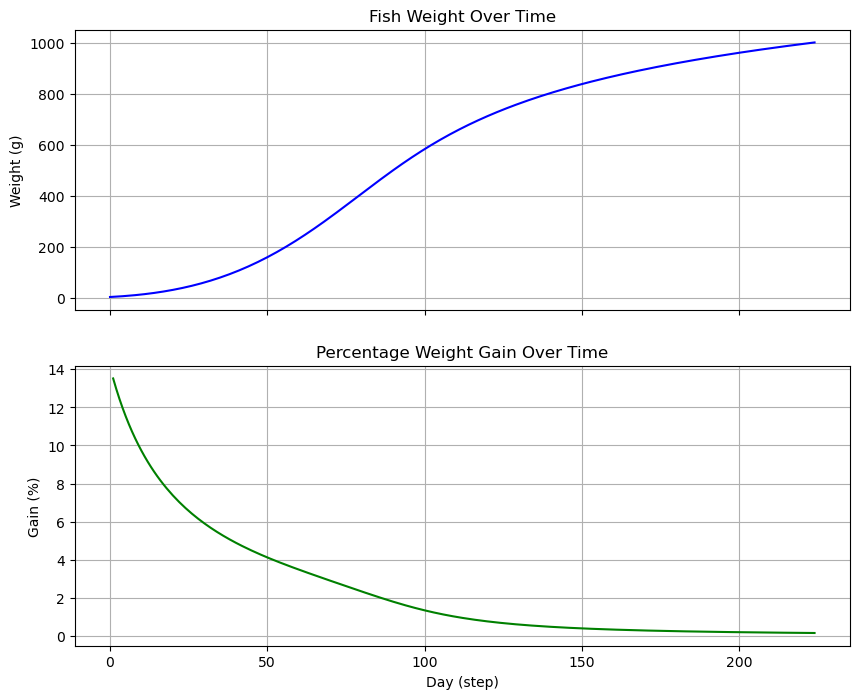

In [8]:
from model.individual_growth_model import IndividualGrowthModel
import matplotlib.pyplot as plt

# Initialize the model
model = IndividualGrowthModel()

final_weight = 1000  # Target weight
current_weight = 5  # Starting weight
iterations = 0

# Lists to store time (iterations), weight, and percentage gain
time_steps = [0]
weights = [current_weight]
percentage_gain = []

# Grow the fish until it reaches or exceeds the final weight
while current_weight < final_weight:
    growth = model.compute_growth(0.6, 33, 1, 0, current_weight)
    percent = (growth / current_weight) * 100
    current_weight += growth
    iterations += 1

    time_steps.append(iterations)
    weights.append(current_weight)
    percentage_gain.append(percent)

# Create two subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot 1: Fish weight over time
axs[0].plot(time_steps, weights, color='blue')
axs[0].set_title('Fish Weight Over Time')
axs[0].set_ylabel('Weight (g)')
axs[0].grid(True)

# Plot 2: Percentage weight gain per step (excluding the first step)
axs[1].plot(time_steps[1:], percentage_gain, color='green')
axs[1].set_title('Percentage Weight Gain Over Time')
axs[1].set_xlabel('Day (step)')
axs[1].set_ylabel('Gain (%)')
axs[1].grid(True)

plt.show()

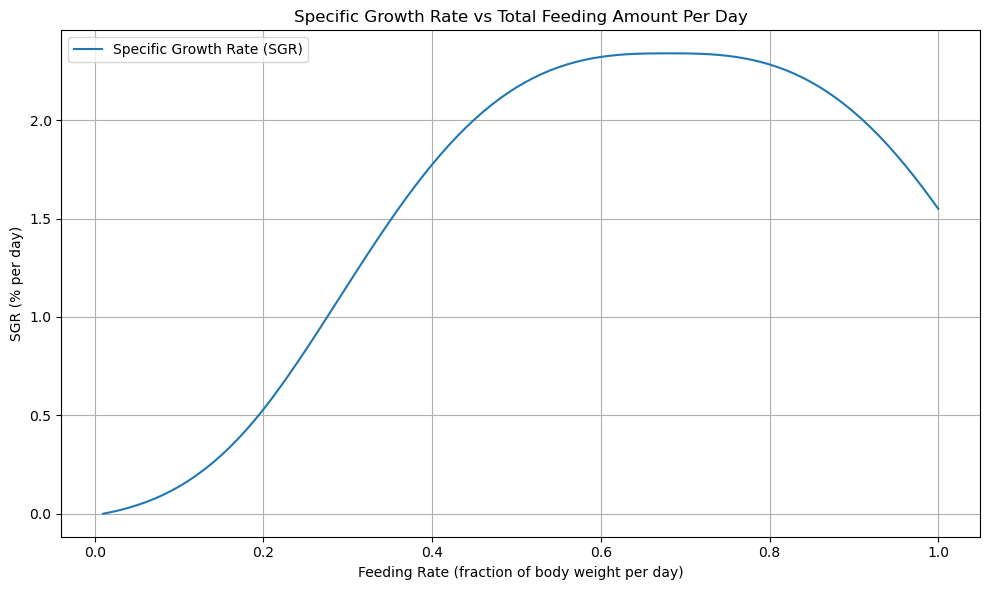

In [5]:
from model.individual_growth_model import IndividualGrowthModel
import matplotlib.pyplot as plt
import numpy as np

model = IndividualGrowthModel()

# Simulation parameters
T = 33  # optimal temperature
DO = 1  # sufficient DO
UIA = 0.01  # low ammonia
w0 = 500  # initial weight (grams)
t_days = 30  # time period (days)

# Generate feeding rate from 0.01 to 1
f_values = np.linspace(0.01, 1.0, 100)
sgr_values = []

# Compute SGR for each feeding rate
for f in f_values:
    w = w0
    for _ in range(t_days):
        growth = model.compute_growth(f, T, DO, UIA, w)
        w += growth
    sgr = (np.log(w) - np.log(w0)) / t_days * 100
    sgr_values.append(sgr)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(f_values, sgr_values, label='Specific Growth Rate (SGR)')
plt.xlabel("Feeding Rate (fraction of body weight per day)")
plt.ylabel("SGR (% per day)")
plt.title("Specific Growth Rate vs Total Feeding Amount Per Day")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [6]:
from model.fish import Fish, FishStage

model = IndividualGrowthModel()
fish = Fish(weight=20, growth_model=model)

for day in range(1000):
    fish.grow(
        feeding_rate=1, 
        temperature=33.0, 
        dissolved_oxygen=1,
        uia=0
    )
    if fish.stage == FishStage.ADULT:
        print(f"Became adult on day {day}!")
        print(fish)
        break

Became adult on day 86!
Fish(stage=adult, weight=311.73g, age=87 days)


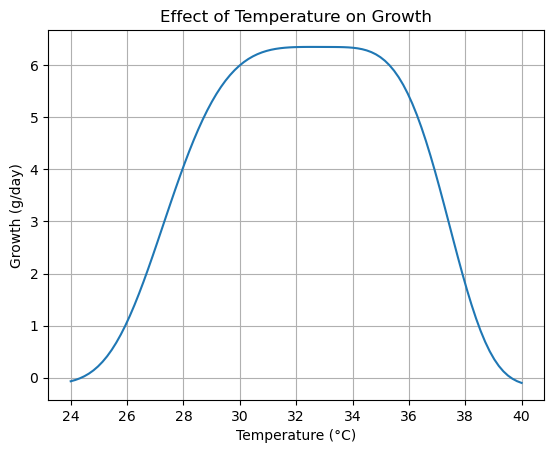

In [7]:
from model.individual_growth_model import IndividualGrowthModel
import numpy as np
import matplotlib.pyplot as plt

model = IndividualGrowthModel()

feed_rate = 1
DO = 1
UIA = 0
weight = 300

temperatures = np.linspace(24, 40, 100)
growth_values = []

for T in temperatures:
    growth = model.compute_growth(feed_rate, T, DO, UIA, weight)
    growth_values.append(growth)

plt.plot(temperatures, growth_values)
plt.xlabel("Temperature (°C)")
plt.ylabel("Growth (g/day)")
plt.title("Effect of Temperature on Growth")
plt.grid(True)
plt.show()


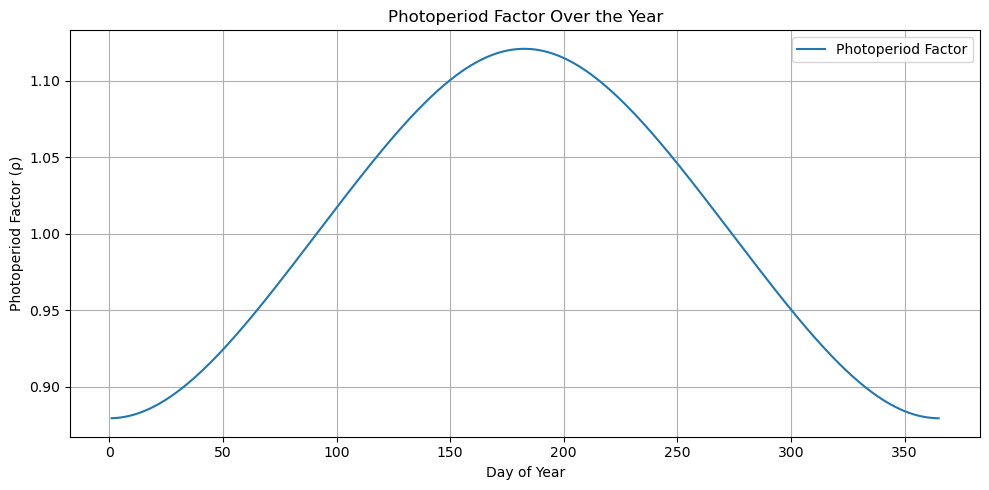

In [8]:
from model.individual_growth_model import IndividualGrowthModel
import matplotlib.pyplot as plt

model = IndividualGrowthModel()
days = list(range(1, 366))
photoperiod_factors = []

for day in days:
    model.set_day_of_year(day)
    photoperiod_factors.append(model.rho)

plt.figure(figsize=(10, 5))
plt.plot(days, photoperiod_factors, label='Photoperiod Factor')
plt.title('Photoperiod Factor Over the Year')
plt.xlabel('Day of Year')
plt.ylabel('Photoperiod Factor (ρ)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()